[*********************100%***********************]  1 of 1 completed

Percentage of closing prices within ±2 standard deviations: 84.38%
Most recent day's std: 0.29
Most recent day's Upper Band: 2.42
Most recent day's Lower Band: 1.24
Most recent day's Upper 1 std Band: 2.12
Most recent day's Lower 1 std Band: 1.54
Most recent day's short SMA: 1.83
Most recent day's Upper Band: 2.12
Dates:  2025-03-04 00:00:00
Today's price: 1.22


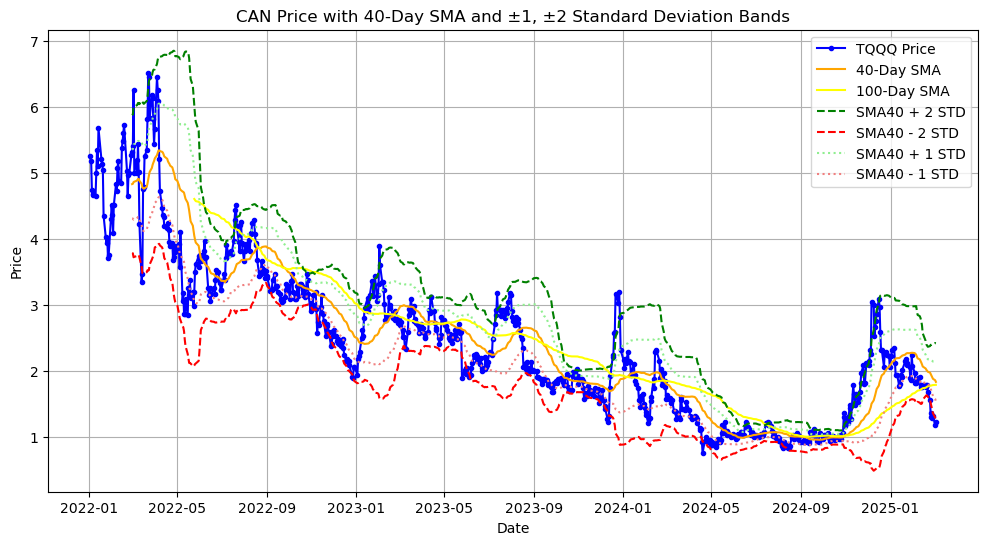

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# User-defined date range
start_date = "2022-01-01"  # Change as needed
end_date = "2025-12-31"    # Change as needed

# Fetch TQQQ data
symbol = "CAN"
data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
data = data.reset_index().droplevel(1, axis=1)
window_num = 40
window_long = 100
# Calculate window_num-day simple moving average (SMAwindow_num)
data[f"SMA{window_num}"] = data["Close"].rolling(window=window_num).mean()
data[f"SMA{window_long}"] = data["Close"].rolling(window=window_long).mean()
# Calculate rolling standard deviation
std_dev = data["Close"].rolling(window=window_num).std()

# Upper and lower bands (SMAwindow_num ± 2 * standard deviation)
data["Upper Band"] = data[f"SMA{window_num}"] + 2 * std_dev
data["Lower Band"] = data[f"SMA{window_num}"] - 2 * std_dev

# Upper and lower bands (SMAwindow_num ± 1 * standard deviation)
data["Upper Band 1"] = data[f"SMA{window_num}"] + 1 * std_dev
data["Lower Band 1"] = data[f"SMA{window_num}"] - 1 * std_dev

# Calculate probability of normal distribution within ±2 standard deviations
within_2_std = ((data["Close"] >= data["Lower Band"]) & (data["Close"] <= data["Upper Band"]))
probability_within_2_std = within_2_std.mean() * 100

# Get the most recent day's upper and lower band values
latest_std = list(std_dev)[-1]
latest_upper_band = data["Upper Band"].iloc[-1]
latest_lower_band = data["Lower Band"].iloc[-1]


latest_sma1 = data[f"SMA{window_num}"].iloc[-1]
latest_price = data['Close'].iloc[-1]
today_date = data['Date'].iloc[-1]
print(f"Percentage of closing prices within ±2 standard deviations: {probability_within_2_std:.2f}%")
print(f"Most recent day's std: {latest_std:.2f}")
print(f"Most recent day's Upper Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower Band: {latest_lower_band:.2f}")

latest_upper_band = data["Upper Band 1"].iloc[-1]
latest_lower_band = data["Lower Band 1"].iloc[-1]



print(f"Most recent day's Upper 1 std Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower 1 std Band: {latest_lower_band:.2f}")
print(f"Most recent day's short SMA: {latest_sma1:.2f}")
print(f"Most recent day's Upper Band: {latest_upper_band:.2f}")
print('Dates: ',today_date)
print(f"Today's price: {latest_price:.2f}")


# Plot the results
data.index = data['Date']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="TQQQ Price", color="blue", marker='.')
plt.plot(data.index, data[f"SMA{window_num}"], label=f"{window_num}-Day SMA", color="orange")
plt.plot(data.index, data[f"SMA{window_long}"], label=f"{window_long}-Day SMA", color="yellow")

plt.plot(data.index, data["Upper Band"], label=f"SMA{window_num} + 2 STD", linestyle="dashed", color="green")
plt.plot(data.index, data["Lower Band"], label=f"SMA{window_num} - 2 STD", linestyle="dashed", color="red")
plt.plot(data.index, data["Upper Band 1"], label=f"SMA{window_num} + 1 STD", linestyle="dotted", color="lightgreen")
plt.plot(data.index, data["Lower Band 1"], label=f"SMA{window_num} - 1 STD", linestyle="dotted", color="lightcoral")

plt.title(f"{symbol} Price with {window_num}-Day SMA and ±1, ±2 Standard Deviation Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [14]:
tqqq_data = data.copy()
tqqq_data['diff'] =  tqqq_data["Close"] - tqqq_data["Lower Band"]
#max_diff = data['diff'].dropna().max()
min_diff = tqqq_data['diff'].dropna().min()
print(min_diff)
print('min_price_possible: ')
print(tqqq_data["Lower Band"].iloc[-1]+min_diff)

-0.3128760843735181
min_price_possible: 
0.9315101232920411
